In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm


#WYSCOUT
df = pd.read_excel('/Users/marclambertes/Downloads/WSL.xlsx')
#df['Player'] = df['Player'].str.split('\\', expand=True)[0]
#df = df[df['Position'] =='LW|RW']

#df = df[df['Position'] =='CF']

df['Position'].fillna('Unknown', inplace=True)
# Filter the DataFrame based on the 'Position' column
#df = df[df['Position'].str.contains('CF')]
df = df[df['Position'].str.contains('CF')]
#df = df[df['Position'].str.contains('^(?!.*CF|.*LW|.*RW|.*AMF).*CM|.*DM$', regex=True)]
df = df[df['Minutes played'] > 500]
#df = df[df['Age'] <= 21]
#df = df[df['League'] == 'Belgian Second Division']

#df = df[df['Tier'] =='Tier 2']

#df = df[df['League'] == 'Belgian First Division B']
#df['League'] = df['League'].replace('2. Frauen-Bundesliga', '2. Frauen-BuLi')
df['Team within selected timeframe'] = df['Team within selected timeframe'].replace('Charleston Southern Buccaneers', 'Charleston Buccaneers')


# Classic winger
original_metrics = ["xA per 90", "Short / medium passes per 90", "Accurate passes, %",
              "Touches in box per 90", "Passes to penalty area per 90", "Key passes per 90",
              "Progressive runs per 90", "Successful dribbles, %", "Received passes per 90",
                   "Progressive passes per 90"]

weights = [3, 1, 0.5, 
           1, 1, 1, 
           2, 3, 1, 
           1]  

#Playmaker winger
new_metrics = ["xG per 90", "xA per 90", "Touches in box per 90",
              "Progressive passes per 90", "Accurate passes, %", "Through passes per 90",
              "Passes to penalty area per 90", "Key passes per 90"]

# Adjust the weights for the new metrics as desired
new_weights = [1, 4, 1,
              4, 0.5, 3,
              1, 4]

#Goalscoring Striker
new_metrics_2 = ["xG per 90", "Goal conversion, %", "Received passes per 90",
               "Key passes per 90", "xA per 90", "Head goals per 90",
              "Aerial duels won, %", "Touches in box per 90", "Non-penalty goals per 90"]

# Adjust the weights for the new metrics as desired
new_weights_2 = [5, 5, 3,
              1, 1, 0.5,
              0.5, 3, 1]

#Target striker
new_metrics_3 = ["xG per 90", "Head goals per 90", "Touches in box per 90",
               "Received passes per 90", "Through passes per 90", "Goal conversion, %",
              "Aerial duels won, %", "Forward passes per 90"]

# Adjust the weights for the new metrics as desired
new_weights_3 = [3, 3, 1,
              3, 1, 1,
              2, 1]


# Calculate the composite score for the original metrics
df["Classic winger"] = np.dot(df[original_metrics], weights)

# Calculate the mean and standard deviation for the composite score of the original metrics
original_mean = df["Classic winger"].mean()
original_std = df["Classic winger"].std()

# Calculate the z-scores for the composite score of the original metrics
df["Classic winger"] = (df["Classic winger"] - original_mean) / original_std

# Map the z-scores of the original metrics to a range of 0 to 100 with two decimal places
df["Classic winger (0-100)"] = (norm.cdf(df["Classic winger"]) * 100).round(2)

# Sort the DataFrame by the z-scores of the original metrics in ascending order
df_original = df.sort_values("Classic winger")

# Save the DataFrame with the z-scores of the original metrics to an Excel file
original_output_filename = "Classic winger.xlsx"
df_original.to_excel(original_output_filename, index=False)

# Calculate the composite score for the new metrics
df["Playmaker winger"] = np.dot(df[new_metrics], new_weights)

# Calculate the mean and standard deviation for the composite score of the new metrics
new_mean = df["Playmaker winger"].mean()
new_std = df["Playmaker winger"].std()

# Calculate the z-scores for the composite score of the new metrics
df["Playmaker winger"] = (df["Playmaker winger"] - new_mean) / new_std

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["Playmaker winger (0-100)"] = (norm.cdf(df["Playmaker winger"]) * 100).round(2)

# Sort the DataFrame by the z-scores of the new metrics in ascending order
df_new = df.sort_values("Playmaker winger")

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["Playmaker winger (0-100)"] = (norm.cdf(df["Playmaker winger"]) * 100).round(2)

# Calculate the composite score for the new metrics
df["Goalscoring striker"] = np.dot(df[new_metrics_2], new_weights_2)

# Calculate the mean and standard deviation for the composite score of the new metrics
new_mean = df["Goalscoring striker"].mean()
new_std = df["Goalscoring striker"].std()

# Calculate the z-scores for the composite score of the new metrics
df["Goalscoring striker"] = (df["Goalscoring striker"] - new_mean) / new_std

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["Goalscoring striker (0-100)"] = (norm.cdf(df["Goalscoring striker"]) * 100).round(2)

# Sort the DataFrame by the z-scores of the new metrics in ascending order
df_new1 = df.sort_values("Goalscoring striker")

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["Goalscoring striker (0-100)"] = (norm.cdf(df["Goalscoring striker"]) * 100).round(2)

# Calculate the composite score for the new metrics
df["Target striker"] = np.dot(df[new_metrics_3], new_weights_3)

# Calculate the mean and standard deviation for the composite score of the new metrics
new_mean = df["Target striker"].mean()
new_std = df["Target striker"].std()

# Calculate the z-scores for the composite score of the new metrics
df["Target striker"] = (df["Target striker"] - new_mean) / new_std

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["Target striker (0-100)"] = (norm.cdf(df["Target striker"]) * 100).round(2)

# Sort the DataFrame by the z-scores of the new metrics in ascending order
df_new2 = df.sort_values("Target striker")

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["Target striker (0-100)"] = (norm.cdf(df["Target striker"]) * 100).round(2)

# Save both sets of z-scores to the same Excel file in the same sheet
output_filename = "z_scores_combined.xlsx"
with pd.ExcelWriter(output_filename) as writer:
    df.to_excel(writer, sheet_name="Z-Scores", index=False)

# Print the list of player names, squads, competitions, and the z-scores for both sets of metrics
print("Player Z-Scores (0-100):")
print(df[["Player", "Age", "Team within selected timeframe", "Classic winger (0-100)", "Playmaker winger (0-100)", "Goalscoring striker (0-100)", "Target striker (0-100)"]])





Player Z-Scores (0-100):
             Player  Age Team within selected timeframe  \
5           R. Daly   32                    Aston Villa   
37        M. Thomas   27              Tottenham Hotspur   
38        V. Asseyi   30                West Ham United   
41      A. Thestrup   28                   Bristol City   
42         A. Russo   24                        Arsenal   
45          R. Ueki   24                West Ham United   
47       E. Terland   22         Brighton & Hove Albion   
49     L. Petermann   29             Leicester City WFC   
59         C. Jones   20                   Bristol City   
62        F. Morgan   23                   Bristol City   
75         L. James   22                        Chelsea   
77          L. Hemp   23                Manchester City   
89          K. Shaw   26                Manchester City   
92          S. Haug   24                      Liverpool   
100     N. Sørensen   26                        Everton   
105      K. Snoeijs   27       

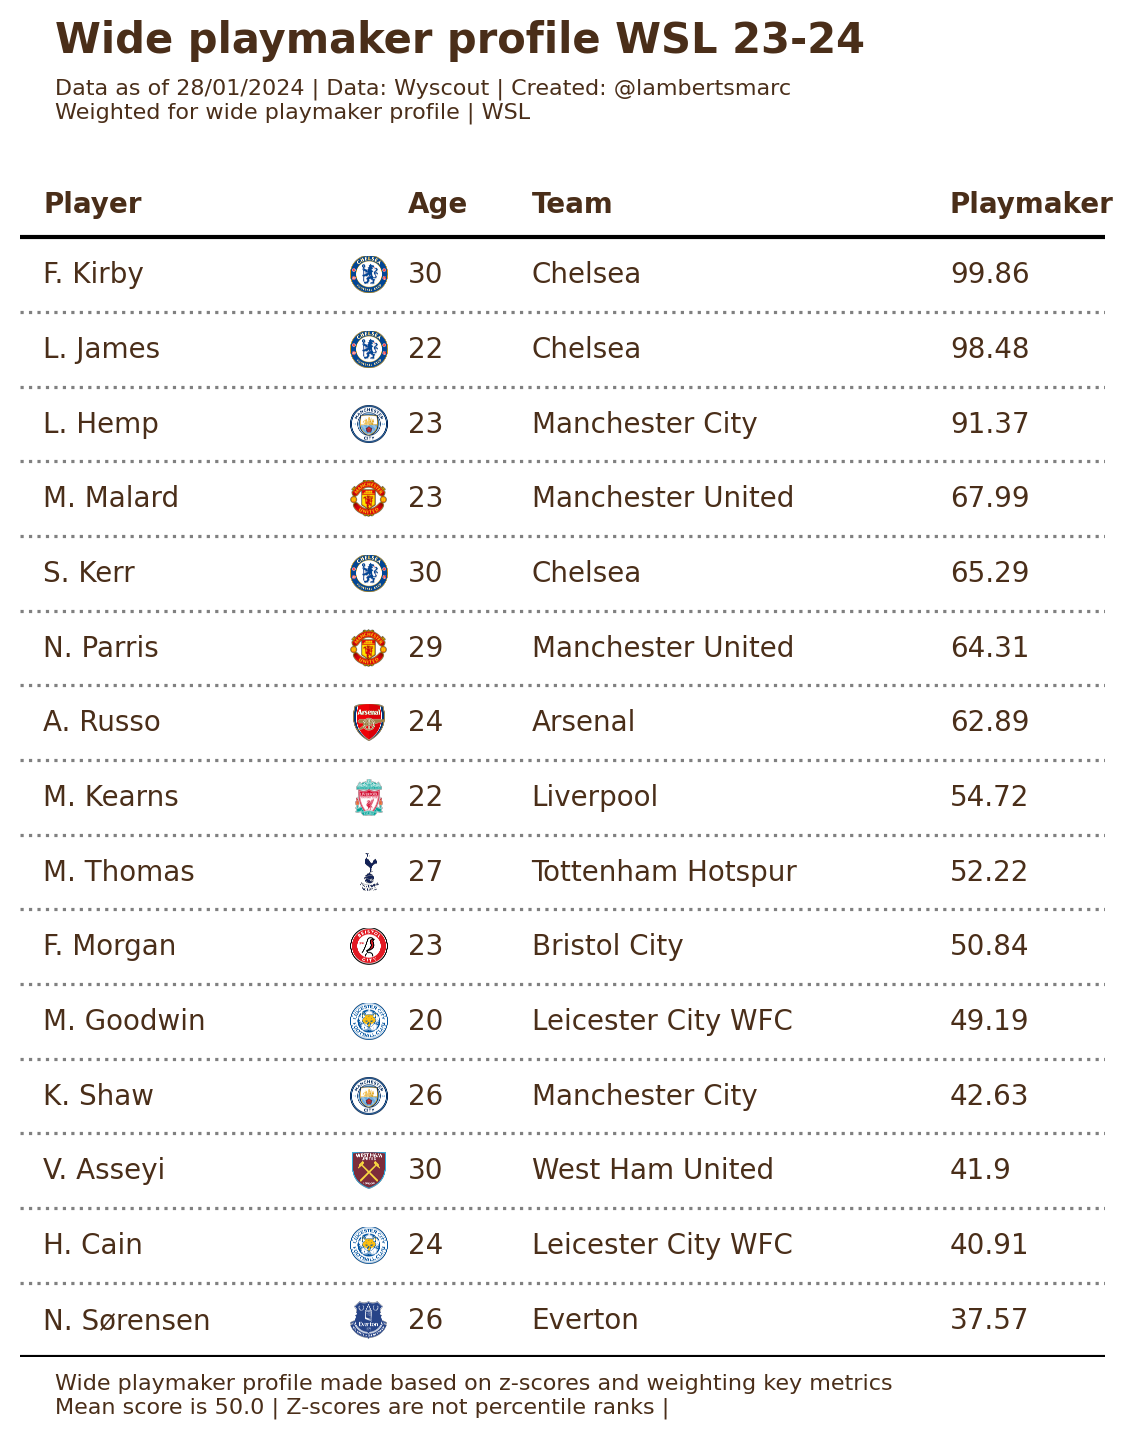

In [4]:
### df = pd.read_excel('z_scores_combined.xlsx')
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
#df = df[df['Team within selected timeframe'] =='Chelsea']

# Assuming you already have a DataFrame named 'df'

# List of teams to exclude
#excluded_teams = ['Club Brugge', 'Antwerp', 'Gent', 'Genk', 'Union Saint-Gilloise', 'Anderlecht']

# Use the .loc method to filter out rows with excluded teams
#df = df[~df['Team within selected timeframe'].isin(excluded_teams)]


df["Classic"] = df["Classic winger (0-100)"] 
df["Playmaker"] = df["Playmaker winger (0-100)"] 
df["Goalscorer"] = df["Goalscoring striker (0-100)"]
df["Target"] = df["Target striker (0-100)"] 



#df["League"] = df["Comp"] 
df["Team"] = df["Team within selected timeframe"] 

def ax_logo(team, ax,):
    path = '/Users/marclambertes/Downloads/Images'
    club_icon = Image.open('%s/%s.png' %(path,team))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

indexdf = df.sort_values(by=['Playmaker'],ascending=False).head(15)[['Player', 'Age', 'Team', 'Playmaker']].reset_index(drop=True)
indexdf_short=indexdf[::-1]

fig = plt.figure(figsize=(7,8), dpi=200)
ax = plt.subplot()

ncols = len(indexdf_short.columns.tolist())+1
nrows = indexdf_short.shape[0]

ax.set_xlim(0, ncols + 2)
ax.set_ylim(0, nrows + 1.5)

# lgs = ['J1', 'J2', 'Ekstraklasa', 'J3']
# if lg in lgs:
positions = [0.15, 2.5, 3.3, 6]
# else:
#     positions = [0.25, 2.25, 3.75, 4.5, 5.25]
columns = indexdf_short.columns.tolist()

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if 'xG per 90' in column:
            text_label = f'{indexdf_short[column].iloc[i]:,.2f}'
            weight = 'regular'
        else:
            text_label = f'{indexdf_short[column].iloc[i]}'
            weight = 'regular'
        ax.annotate(
            xy=(positions[j], i + .5),
            text = text_label,
            ha='left',
            va='center', color='#4A2E19',
            weight=weight
        )

# Add column names
column_names = columns
for index, c in enumerate(column_names):
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha='left',
            va='bottom',
            weight='bold', color='#4A2E19'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.set_axis_off()

DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2.0, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(indexdf_short['Team'].iloc[x], flag_ax,)

fig.text(
    x=0.15, y=.92,
    s='Wide playmaker profile WSL 23-24',
    ha='left',
    va='bottom',
    weight='bold',
    size=15, color='#4A2E19'
)
fig.text(
    x=0.15, y=.91,
    s='Data as of 28/01/2024 | Data: Wyscout | Created: @lambertsmarc\nWeighted for wide playmaker profile | WSL',
    ha='left',
    va='top',
    weight='regular',
    size=8, color='#4A2E19'
)
fig.text(
    x=0.15, y=.10,
    s='Wide playmaker profile made based on z-scores and weighting key metrics\nMean score is 50.0 | Z-scores are not percentile ranks |',
    ha='left',
    va='top',
    weight='regular',
    size=8, color='#4A2E19'
)


plt.savefig('WSL playmaker - goal.png',dpi=750,bbox_inches = 'tight', facecolor='white')

#output_filename = "CF Dutch Tweede Divisie 23-24.pdf"
#plt.savefig(output_filename, format="pdf")

    


In [51]:
import PyPDF2

# Create a PDF merger object
pdf_merger = PyPDF2.PdfMerger()

# List of PDF files to merge
pdf_files = ["CF Dutch Eredivisie 23-24.pdf", "CF Dutch Eerste Divisie 23-24.pdf", "CF Dutch Tweede Divisie 23-24.pdf"
            , "CF Belgian First Division 23-24.pdf", "CF Belgian Second Division 23-24.pdf"]
# Loop through the list of PDF files and append them to the merger
for pdf_file in pdf_files:
    pdf_merger.append(pdf_file)

# Output file for the merged PDF
output_pdf = "merged.pdf"

# Write the merged PDF to the output file
pdf_merger.write(output_pdf)

# Close the merger object
pdf_merger.close()
